# **TUGAS PRAKTIKUM**
## Rizaldy Ali Machfuddin
## TI - 3F
## 2141720115 / 26

#### 1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

#### Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#### 2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [17]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

#### 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

<BarContainer object of 256 artists>

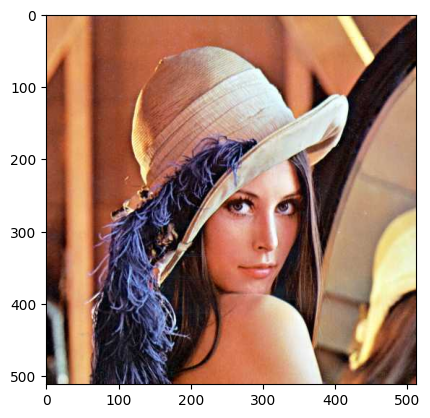

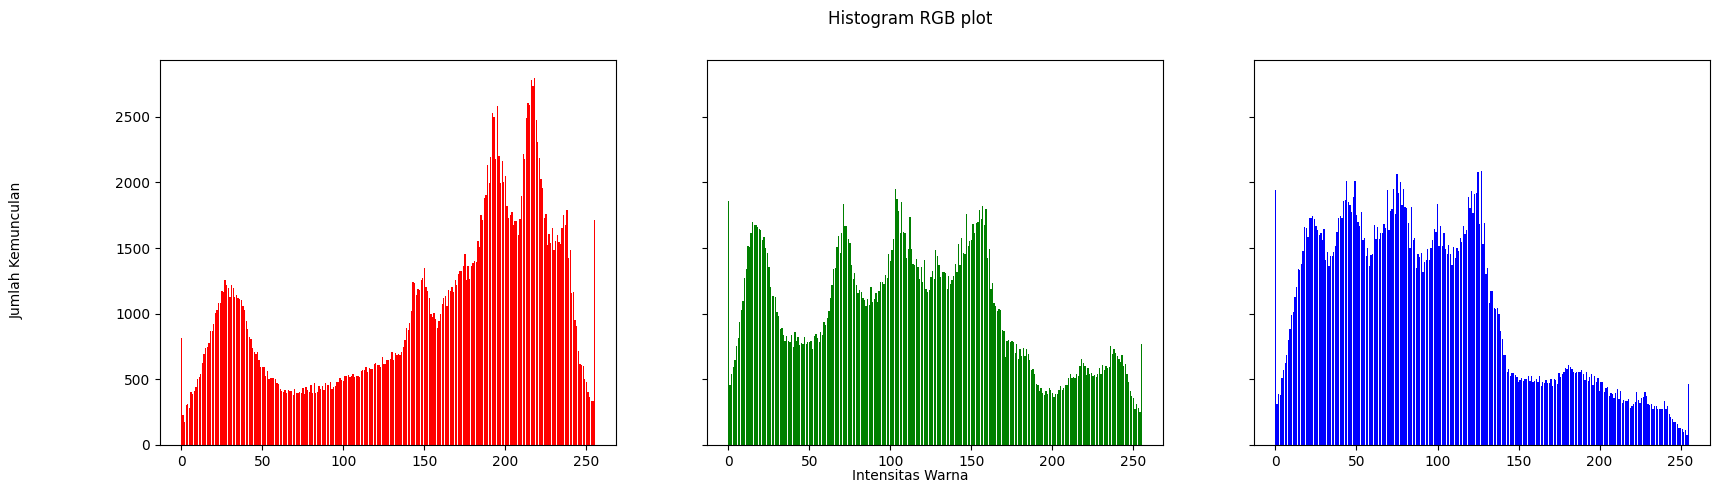

In [18]:
img_1 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg')
img_rgb = cv.cvtColor(img_1,cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img_1)
names = np.arange(256)
plt.imshow(img_rgb)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

#### 4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

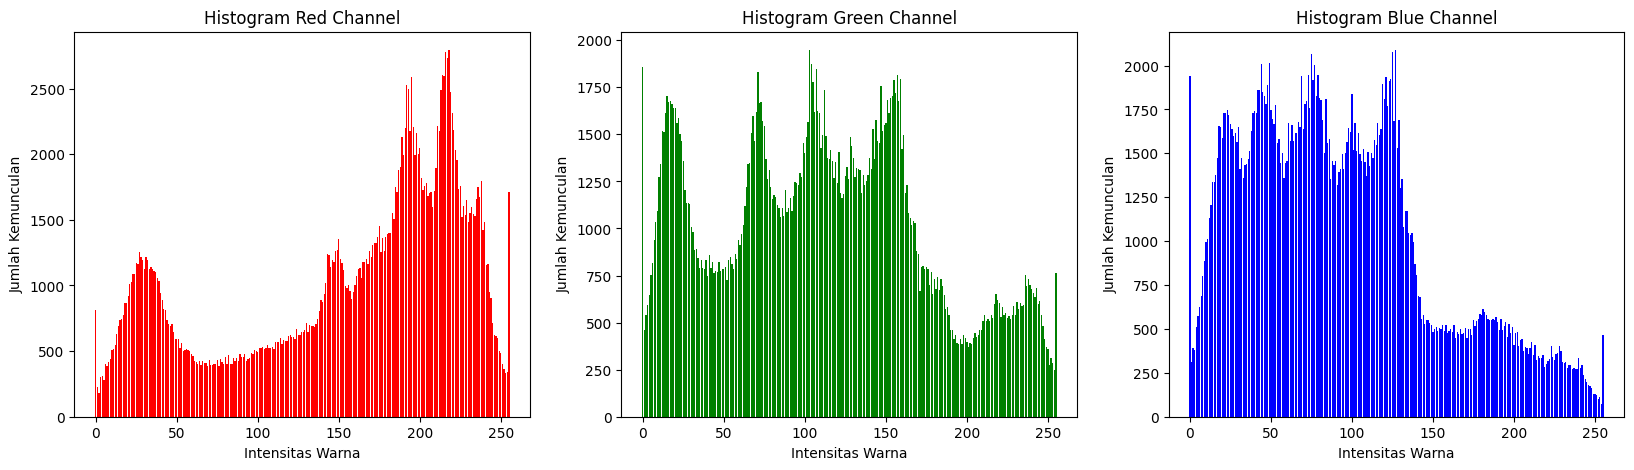

In [20]:
# Baca citra
img_1 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg')

# Ubah format citra dari BGR ke RGB
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)

# Hitung histogram menggunakan NumPy
hist_blue = np.histogram(img_1[:,:,0], bins=256, range=(0,256))
hist_green = np.histogram(img_1[:,:,1], bins=256, range=(0,256))
hist_red = np.histogram(img_1[:,:,2], bins=256, range=(0,256))

# Plot histogram
plt.figure(figsize=[20,5])
plt.subplot(131)
plt.bar(hist_red[1][:-1], hist_red[0], color='red')
plt.title('Histogram Red Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(132)
plt.bar(hist_green[1][:-1], hist_green[0], color='green')
plt.title('Histogram Green Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(133)
plt.bar(hist_blue[1][:-1], hist_blue[0], color='blue')
plt.title('Histogram Blue Channel')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.show()


#### Hasilnya sama dengan yang didapatkan sebelumnya. Perbedaannya adalah metode ini menggunakan fungsi np.histogram untuk menghitung histogram dan kemudian menggunakan matplotlib untuk memplot histogramnya.

#### 5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


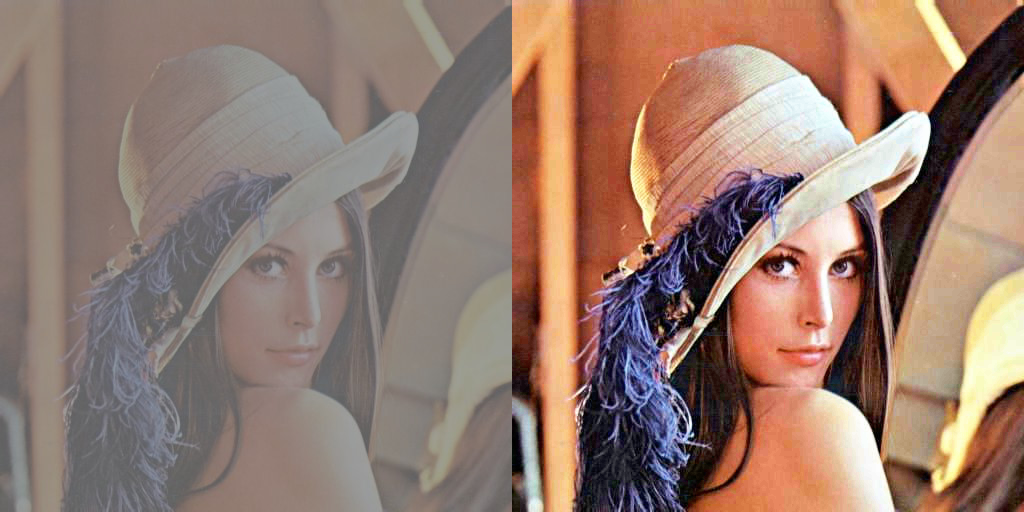

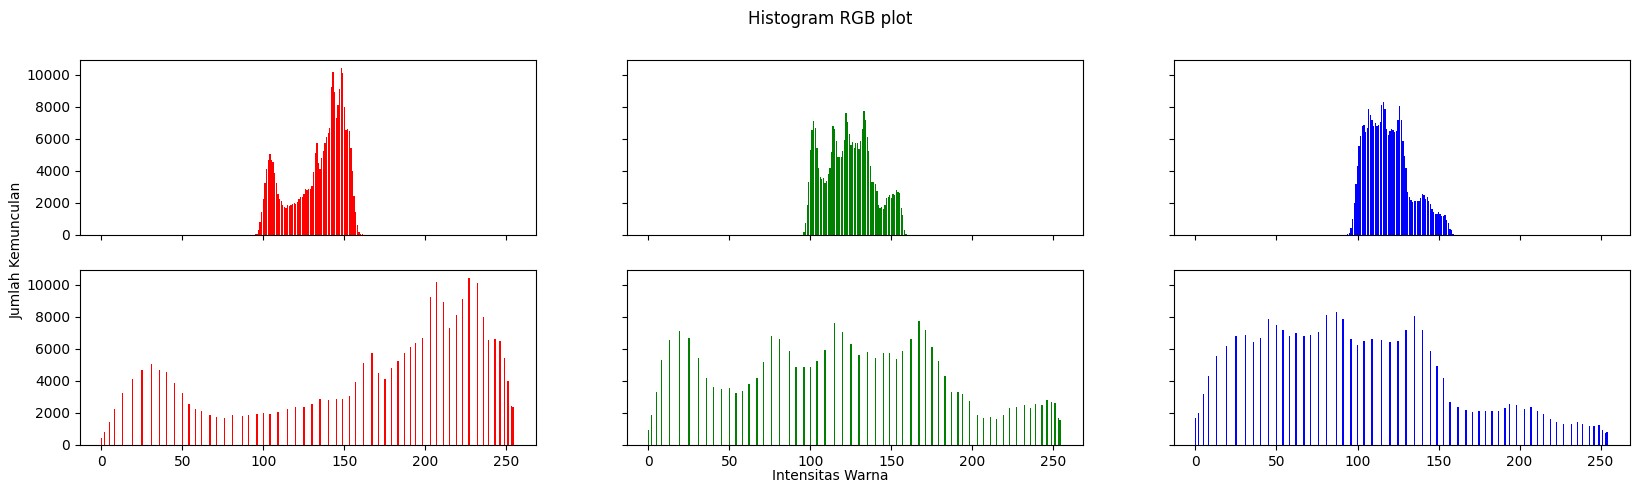

In [34]:
# Membaca citra
img1 = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena_lc.jpg')

def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert to Numpy array
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256)
# Check if the image is grayscale or color
if img1.shape[-1] == 1:
    # Grayscale image
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram Grayscale plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')
else:
    # Color image
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')

#### 6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?


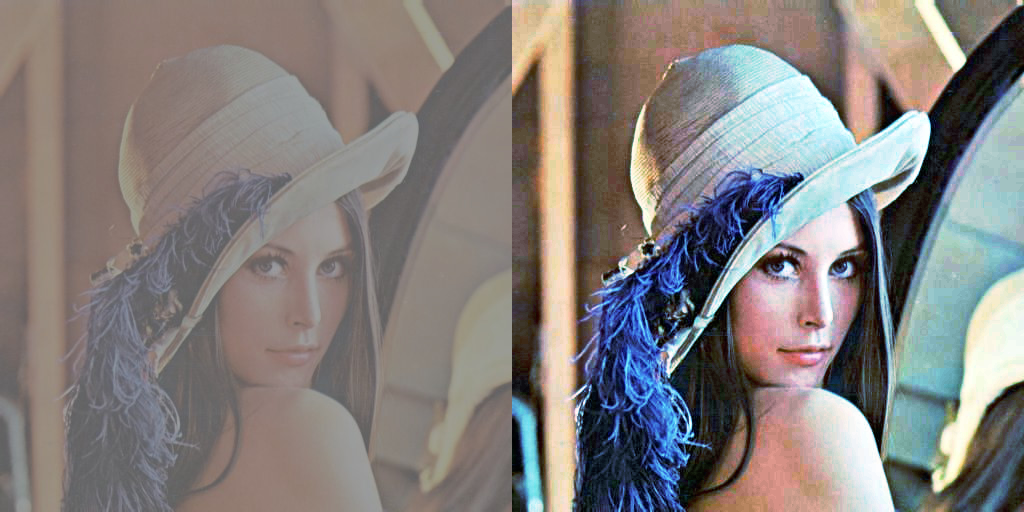

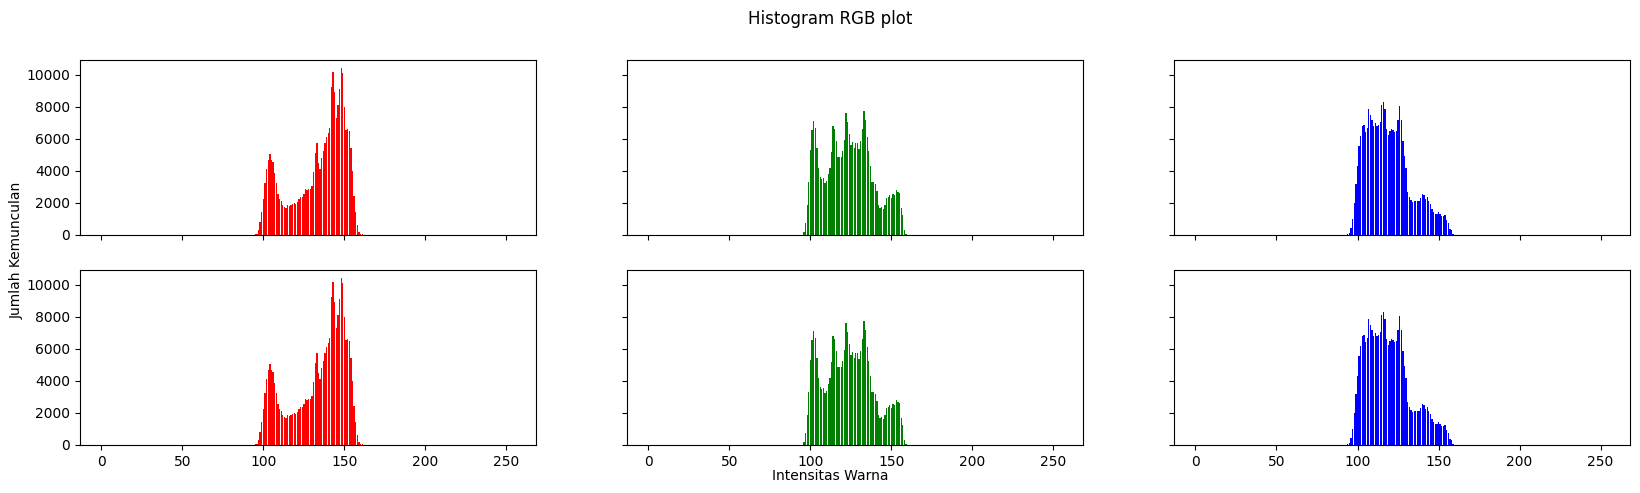

In [35]:
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

#### 7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

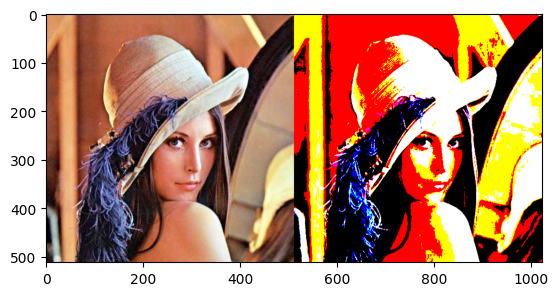

In [45]:
lena_original = plt.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg')

def WarnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(WarnaPallette)):
    rDiff = r - WarnaPallette[i][0]
    gDiff = g - WarnaPallette[i][1]
    bDiff = b - WarnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = lena_original
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = WarnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = WarnaPallette[baru]

final_frame = cv.hconcat((img_16jt, img_8))
plt.imshow(final_frame)

#### 8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

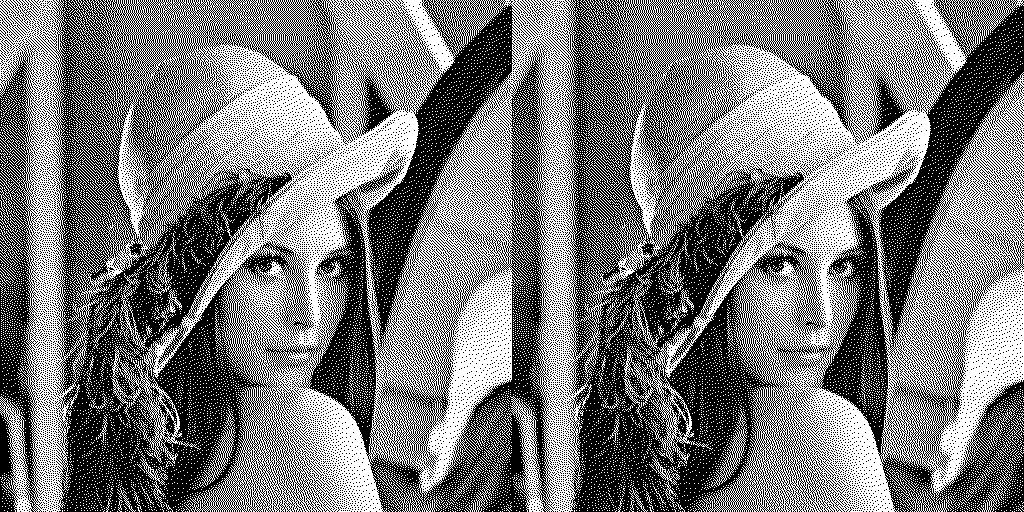

In [52]:
from PIL import Image

# Muat gambar dan ubah menjadi RGB menggunakan dithering Floyd-Steinberg
imageConvert = Image.open('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena_02.jpg')

# Muat gambar asli
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg')

# Memuat gambar ragu-ragu
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK_Ganjil 2023/Images/dataset/lena.jpg')

# Menampilkan gambar asli dan gambar ragu-ragu
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

#### 9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!
